In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rea-games-clear-dataset/rea_games_dataset_updated.csv


## About The Dataset:
The Rea Games dataset provides valuable insights into the gaming industry, offering detailed data on game sales, player demographics, and user engagement. This dataset is designed for exploratory data analysis (EDA) to uncover patterns and trends within the gaming sector, helping analysts, game developers, and industry researchers better understand player behavior, revenue drivers, and popular game genres.

1. Sales Analysis:
Which games have generated the highest and lowest sales?
What are the total sales by platform or genre?
How do sales trends vary across different release dates?

2. Player Demographics:
What is the distribution of players across age groups and regions?
How does the gender distribution look within popular game genres?
Are there specific genres that appeal more to certain age groups?

3. User Engagement:
Which games have the highest player engagement metrics, such as playtime or in-game purchases

4. Game Category Trends:
Which genres and platforms have the highest ratings?
How do ratings correlate with player count and sales?

5. Regional Insights
How do sales and player demographics differ by region?

## These are some questions and I am answering in this notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/rea-games-clear-dataset/rea_games_dataset_updated.csv")

In [4]:
df.head()

,Game ID,Game Name,Platform,Genre,Release Date,Sales (Million $),Player Count (Million),Region,Age Group,Gender,Rating
0,GAME00001,Write always.,Xbox,RPG,2021-09-02,56.06,25.41,South America,46+,Male,1
1,GAME00002,Return.,Nintendo Switch,Adventure,2024-09-04,81.41,41.88,Asia,10-18,Female,8
2,GAME00003,Vote beautiful.,PC,Sports,2024-08-22,44.51,47.32,Asia,10-18,Male,8
3,GAME00004,Five operation be.,PC,Sports,2022-07-28,91.69,32.97,Australia,19-25,Male,8
4,GAME00005,Current above recent.,Xbox,Sports,2018-02-11,79.79,39.50,North America,46+,Female,8


In [5]:
df.shape

(50000, 11)

In [6]:
df.isnull().sum()

Game ID                   0
Game Name                 0
Platform                  0
Genre                     0
Release Date              0
Sales (Million $)         0
Player Count (Million)    0
Region                    0
Age Group                 0
Gender                    0
Rating                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game ID                 50000 non-null  object 
 1   Game Name               50000 non-null  object 
 2   Platform                50000 non-null  object 
 3   Genre                   50000 non-null  object 
 4   Release Date            50000 non-null  object 
 5   Sales (Million $)       50000 non-null  float64
 6   Player Count (Million)  50000 non-null  float64
 7   Region                  50000 non-null  object 
 8   Age Group               50000 non-null  object 
 9   Gender                  50000 non-null  object 
 10  Rating                  50000 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [8]:
df["Release Date"]= pd.to_datetime(df["Release Date"],errors='coerce' )

In [9]:
df.describe()

,Release Date,Sales (Million $),Player Count (Million),Rating
count,50000,50000.000000,50000.000000,50000.000000
mean,2019-10-08 06:07:58.656000256,50.216254,24.974368,5.511440
min,2014-10-02 00:00:00,0.500000,0.100000,1.000000
25%,2017-04-13 00:00:00,25.517500,12.520000,3.000000
50%,2019-10-08 00:00:00,50.335000,24.950000,6.000000
75%,2022-04-07 00:00:00,75.040000,37.380000,8.000000
max,2024-10-01 00:00:00,100.000000,50.000000,10.000000
std,NaN,28.645562,14.357901,2.880957


<Axes: ylabel='count'>

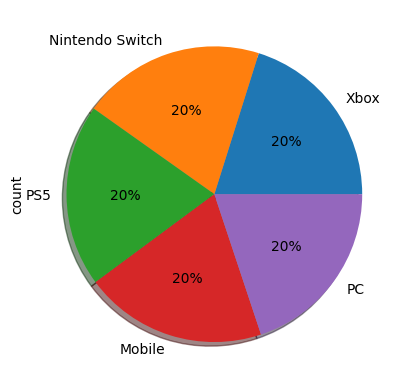

In [10]:
df["Platform"].value_counts().plot(kind ="pie",autopct='%.0f%%',shadow = True)

In [11]:
# Games with highest sales
top_selling_games = df.sort_values(by = "Sales (Million $)",ascending = False).head(10)

# Games with lowest sales
lowest_selling_games = df.sort_values(by = "Sales (Million $)", ascending = True).head(10)

print("Top Selling Games:\n",top_selling_games[["Game Name","Sales (Million $)"]])
print("\nLowert Selling Games:\n",lowest_selling_games[["Game Name","Sales (Million $)"]])

Top Selling Games:
                           Game Name  Sales (Million $)
26641                 Find eat say.             100.00
49231                    Eat those.             100.00
1583          Value feel the light.              99.99
32170  Opportunity single material.              99.99
20006              Laugh know join.              99.99
24376               From trip best.              99.99
47566           Speak board myself.              99.99
10830            All whatever song.              99.99
8221                   Some school.              99.99
32773               Record country.              99.99

Lowert Selling Games:
                        Game Name  Sales (Million $)
18119             Forward teach.               0.50
7568     Smile between practice.               0.50
33477     Land participant name.               0.50
24363         Full also purpose.               0.50
29849  Nature building law only.               0.50
37689         Chair note moment.       

In [12]:
# Total sales by genre
total_sales_by_genre = df.groupby("Genre")["Sales (Million $)"].sum().sort_values(ascending = False)

# Total sales by platform
total_sales_by_platform = df.groupby("Platform")["Sales (Million $)"].sum().sort_values(ascending = False)

print("Total Sales by Genre:\n",total_sales_by_genre)
print("\nTotal Sales by Platform:\n",total_sales_by_platform)

Total Sales by Genre:
 Genre
Adventure    430790.91
Shooter      426503.66
Sports       418723.04
Strategy     416704.01
RPG          414758.71
Action       403332.38
Name: Sales (Million $), dtype: float64

Total Sales by Platform:
 Platform
Xbox               506054.76
Nintendo Switch    504620.78
PS5                503418.09
Mobile             498627.49
PC                 498091.59
Name: Sales (Million $), dtype: float64


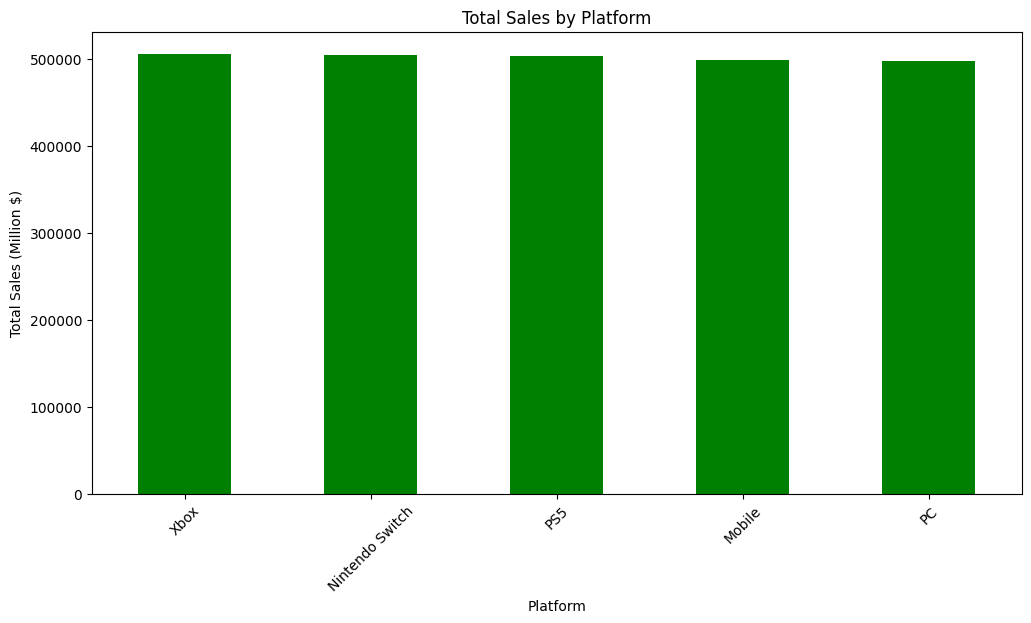

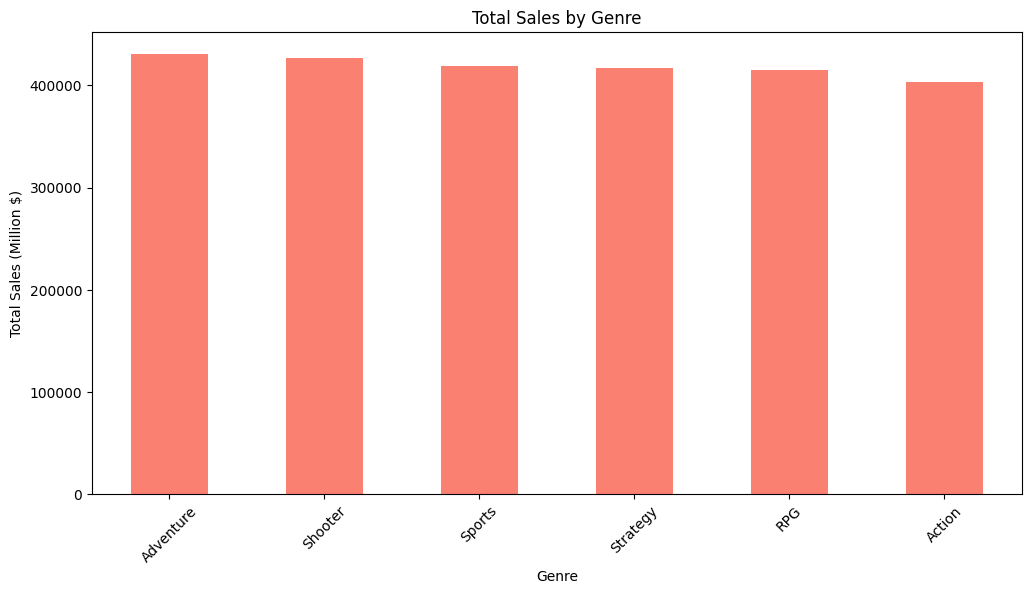

In [13]:
 # Plot total sales by platform
plt.figure(figsize=(12, 6))
total_sales_by_platform.plot(kind='bar', color='green')
plt.title("Total Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Sales (Million $)")
plt.xticks(rotation=45)
plt.show()

# Plot total sales by genre
plt.figure(figsize=(12, 6))
total_sales_by_genre.plot(kind='bar', color='salmon')
plt.title("Total Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (Million $)")
plt.xticks(rotation=45)
plt.show()


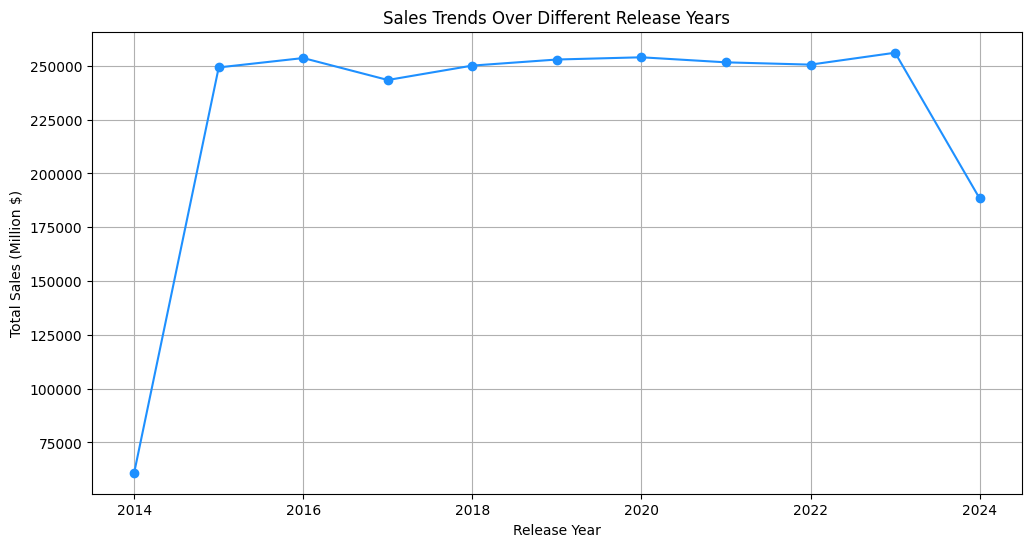

In [14]:
# Step 1: Ensure Release Date is in datetime format
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Step 2: Extract the year from the Release Date
df["Release Year"] = df["Release Date"].dt.year

# Step 3: Group by Release Year and calculate total sales
sales_by_year = df.groupby("Release Year")["Sales (Million $)"].sum().sort_index()

# Step 4: Plot the sales trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", color="dodgerblue")
plt.title("Sales Trends Over Different Release Years")
plt.xlabel("Release Year")
plt.ylabel("Total Sales (Million $)")
plt.grid(True)
plt.show()




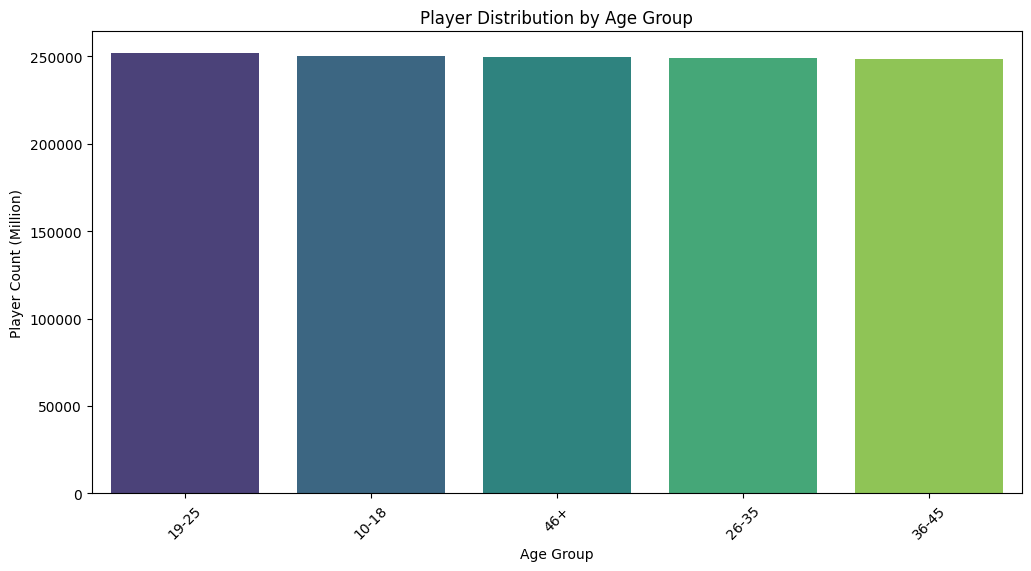

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


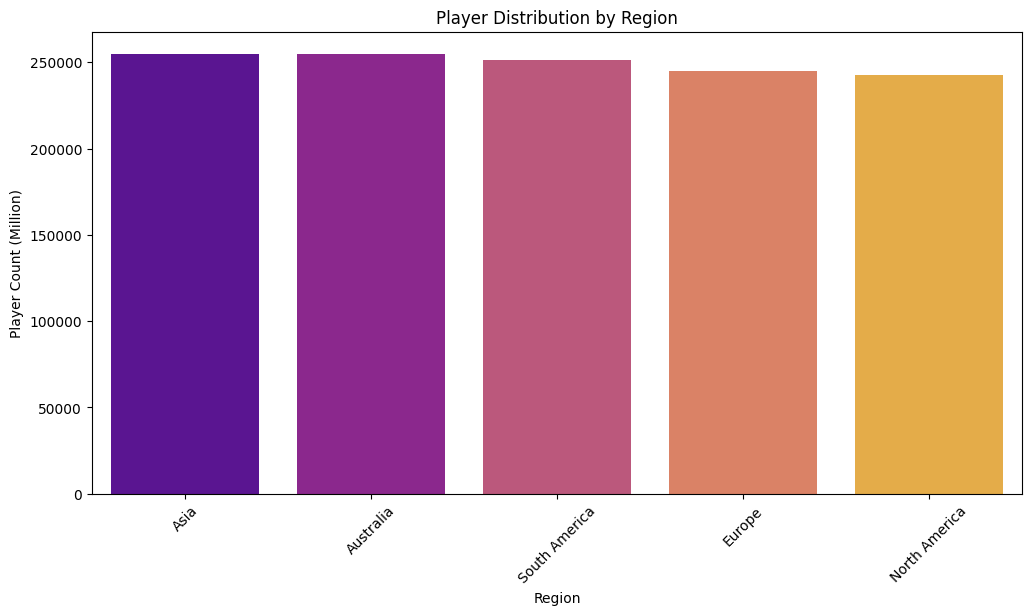

In [15]:
 # Calculate distribution by Age Group
player_distribution_age = df.groupby("Age Group")["Player Count (Million)"].sum().sort_values(ascending = False)

# Calculate distribution by Region
player_distribution_region = df.groupby("Region")["Player Count (Million)"].sum().sort_values(ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x = player_distribution_age.index, y = player_distribution_age.values,palette="viridis")
plt.title("Player Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Player Count (Million)")
plt.xticks(rotation=45)
plt.show()

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

plt.figure(figsize=(12, 6))
sns.barplot(x = player_distribution_region.index, y = player_distribution_region.values,palette="plasma")
plt.title("Player Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Player Count (Million)")
plt.xticks(rotation=45)
plt.show()

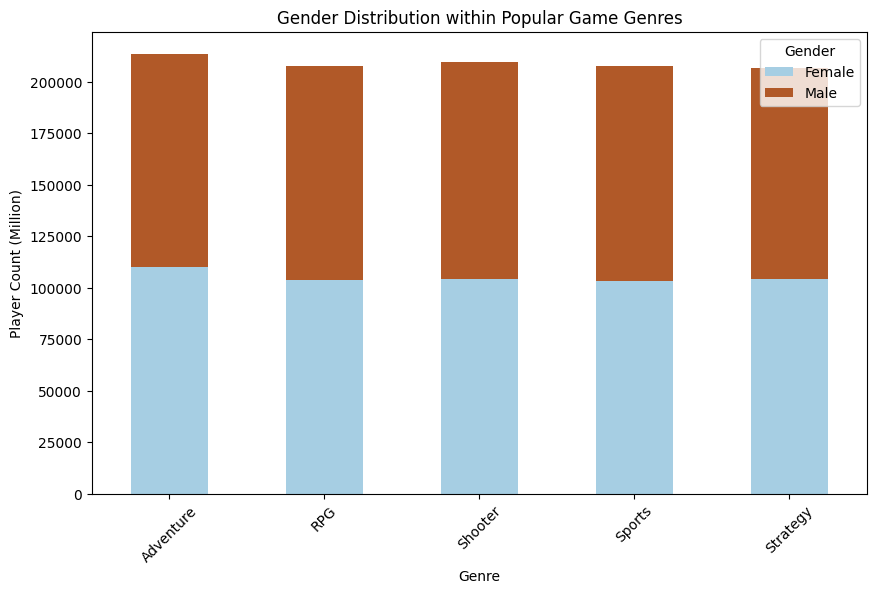

In [16]:
 # Filter for popular genres (optional)
# Define popularity based on player count or total sales, e.g., top 5 genres by player count
popular_genres = df.groupby("Genre")["Player Count (Million)"].sum().nlargest(5).index

# Group by Genre and Gender, summing the player count
gender_distribution = df[df["Genre"].isin(popular_genres)].groupby(["Genre", "Gender"])["Player Count (Million)"].sum().unstack()

gender_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Paired")
plt.title("Gender Distribution within Popular Game Genres")
plt.xlabel("Genre")
plt.ylabel("Player Count (Million)")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


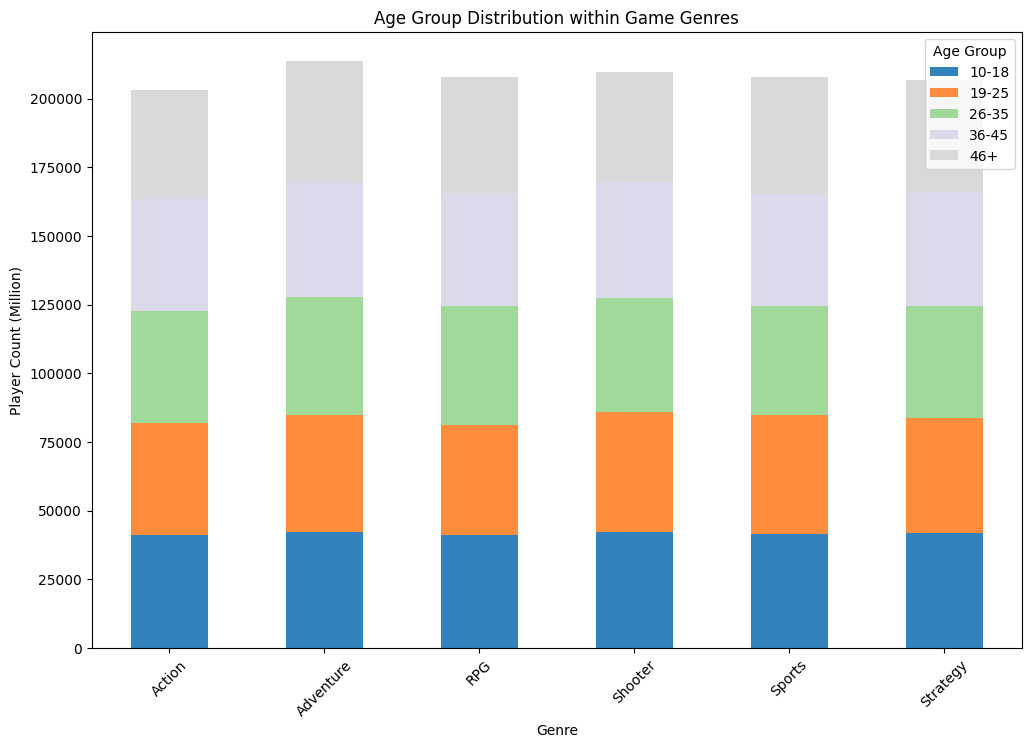

In [17]:
# Grouping by Genre and Age Group, summing player counts for each group
age_genre_distribution = df.groupby(["Genre","Age Group"])["Player Count (Million)"].sum().unstack()

# Plotting a stacked bar chart to show the age distribution within each genre
age_genre_distribution.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="tab20c")
plt.title("Age Group Distribution within Game Genres")
plt.xlabel("Genre")
plt.ylabel("Player Count (Million)")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()


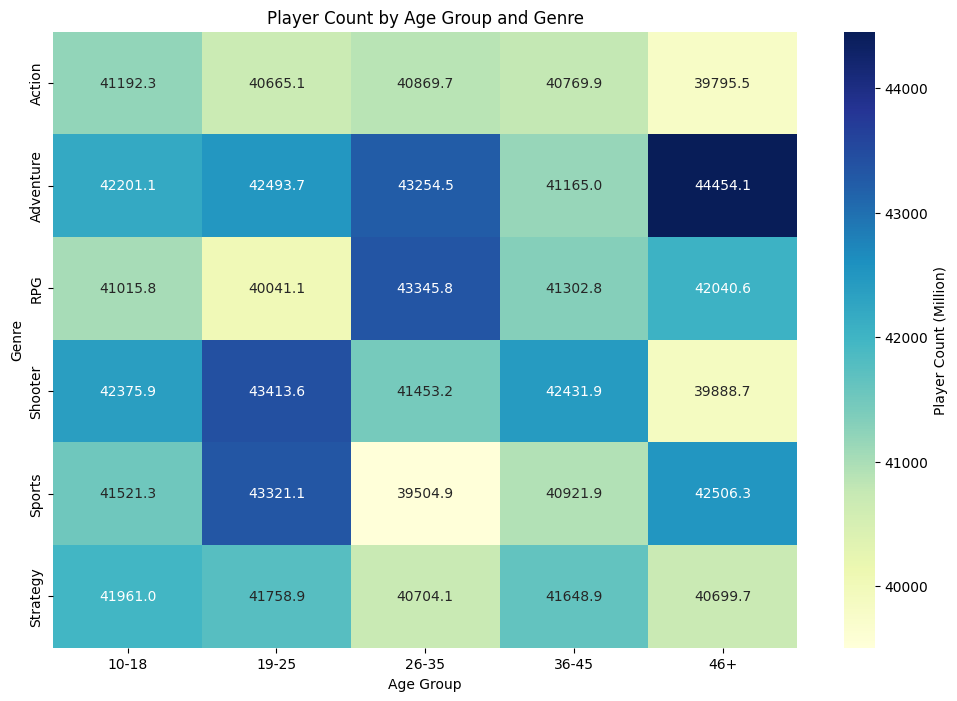

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(age_genre_distribution, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Player Count (Million)'})
plt.title("Player Count by Age Group and Genre")
plt.xlabel("Age Group")
plt.ylabel("Genre")
plt.show()

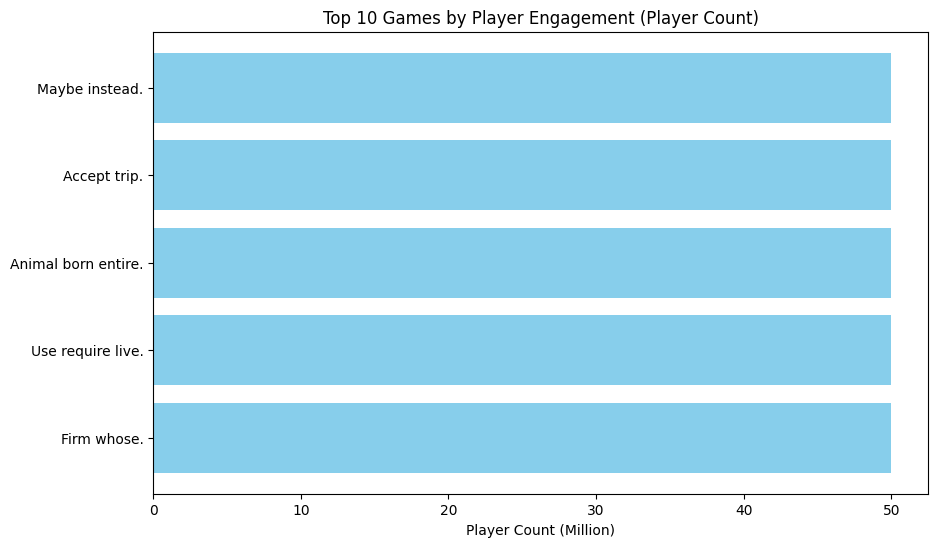

In [19]:
top_engaged_games = df.sort_values(by = "Player Count (Million)",ascending = False).head()

plt.figure(figsize=(10, 6))
plt.barh(top_engaged_games["Game Name"], top_engaged_games["Player Count (Million)"], color="skyblue")
plt.xlabel("Player Count (Million)")
plt.title("Top 10 Games by Player Engagement (Player Count)")
plt.gca().invert_yaxis()
plt.show()

In [20]:
# Calculate the average rating by genre
avg_rating_by_genre = df.groupby("Genre")["Rating"].mean().sort_values(ascending = False)

# Calculate the average rating by platform
avg_rating_by_platform = df.groupby("Platform")["Rating"].mean().sort_values(ascending = False)

print("Highest Rated Genres:\n", avg_rating_by_genre.head(10)) 
print("\nHighest Rated Platforms:\n", avg_rating_by_platform.head(10)) 

Highest Rated Genres:
 Genre
Adventure    5.534892
Strategy     5.532192
Sports       5.510280
Shooter      5.506152
RPG          5.496197
Action       5.487715
Name: Rating, dtype: float64

Highest Rated Platforms:
 Platform
Xbox               5.546520
PS5                5.517127
Nintendo Switch    5.510781
PC                 5.499195
Mobile             5.483221
Name: Rating, dtype: float64


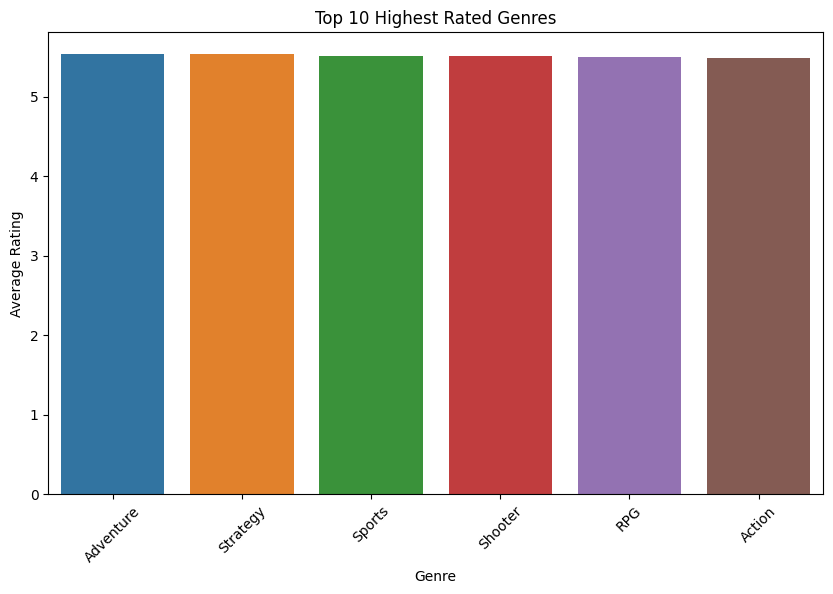

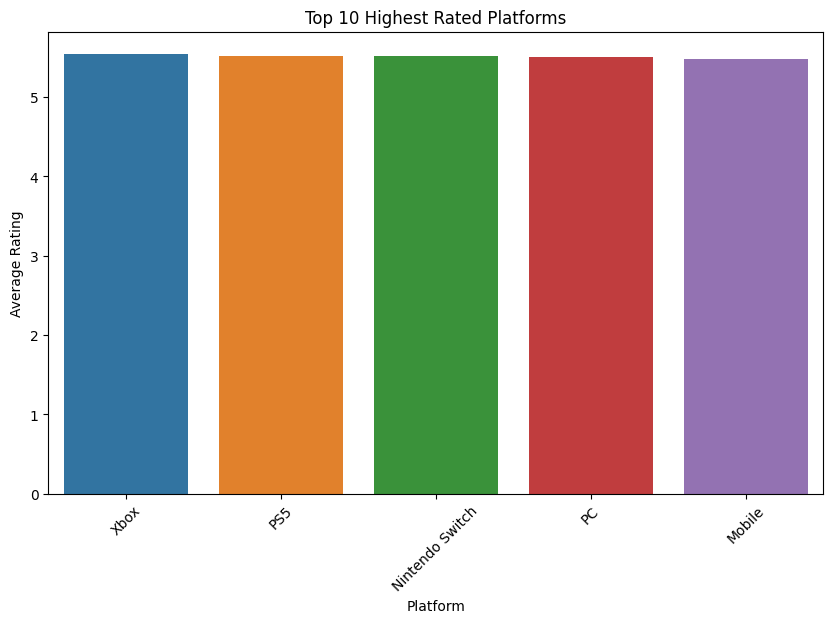

In [21]:

# Plot for Highest Rated Genres
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_by_genre.head(10).index, y=avg_rating_by_genre.head(10).values)
plt.title("Top 10 Highest Rated Genres")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Plot for Highest Rated Platforms
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_by_platform.head(10).index, y=avg_rating_by_platform.head(10).values)
plt.title("Top 10 Highest Rated Platforms")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


                          Rating  Player Count (Million)  Sales (Million $)
Rating                  1.000000               -0.007585           0.006786
Player Count (Million) -0.007585                1.000000           0.008388
Sales (Million $)       0.006786                0.008388           1.000000




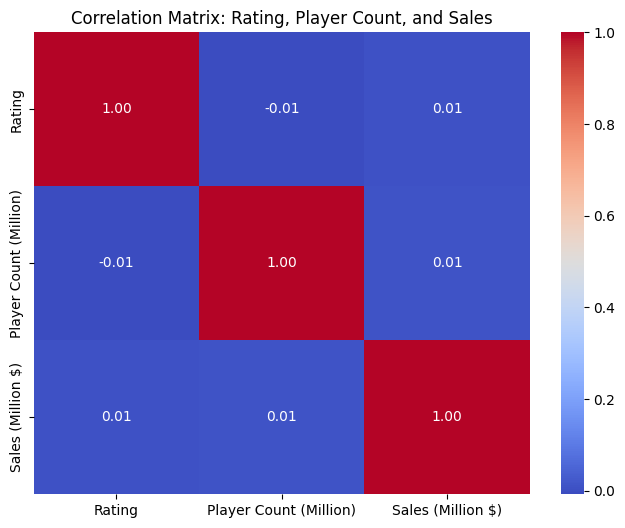

In [22]:
# Calculate the correlation between Rating, Player Count, and Sales
correlation_matrix = df[['Rating', 'Player Count (Million)', 'Sales (Million $)']].corr()

# Print the correlation matrix
print(correlation_matrix)
print("\n")

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Rating, Player Count, and Sales")
plt.show()


Sales and Player Count by Region:
                Sales (Million $)  Player Count (Million)
Region                                                  
Asia                   508279.16               254981.46
Australia              510237.60               254780.58
Europe                 496609.76               245174.79
North America          486710.83               242453.32
South America          508975.36               251328.23

Age Group Distribution by Region:
 Age Group      10-18  19-25  26-35  36-45   46+
Region                                         
Asia            2018   2043   1981   2124  1923
Australia       2035   2044   2058   1980  2038
Europe          1985   1988   1919   1941  1994
North America   2029   1976   1952   1864  1984
South America   2029   2010   2019   1962  2104

Gender Distribution by Region:
 Gender         Female  Male
Region                     
Asia             5040  5049
Australia        5130  5025
Europe           5020  4807
North America    4889

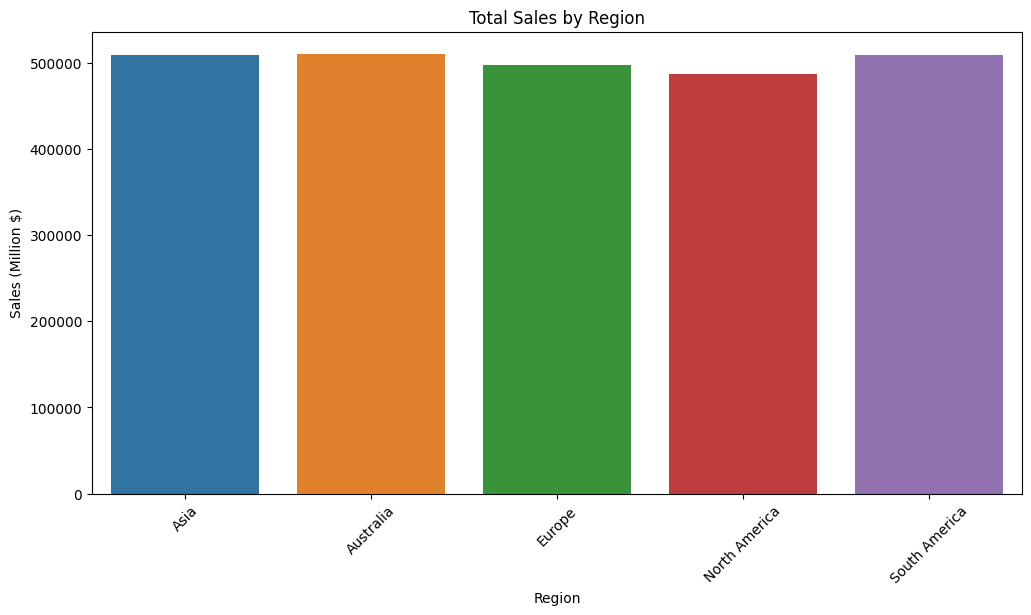

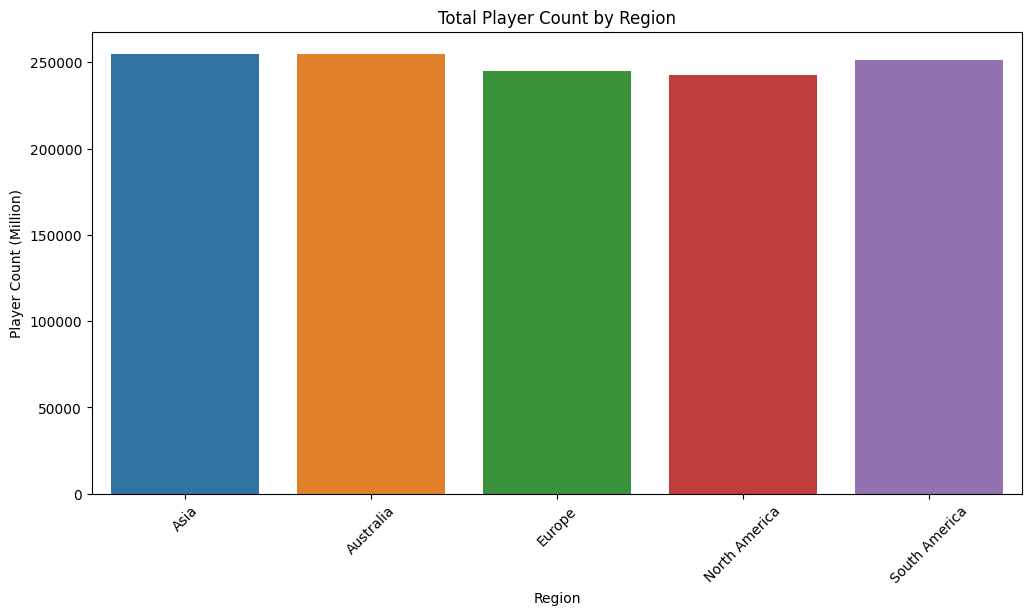

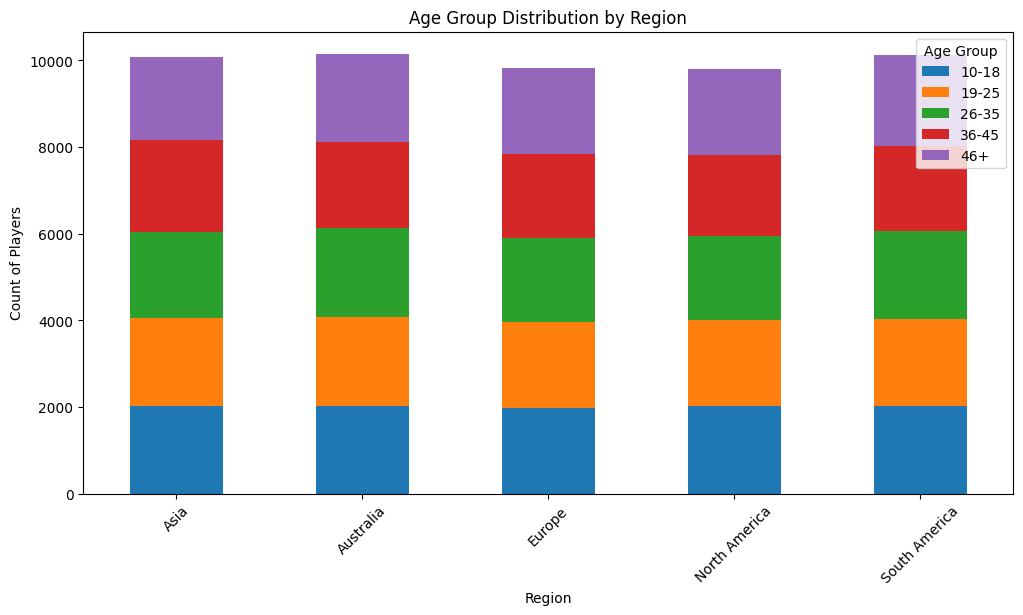

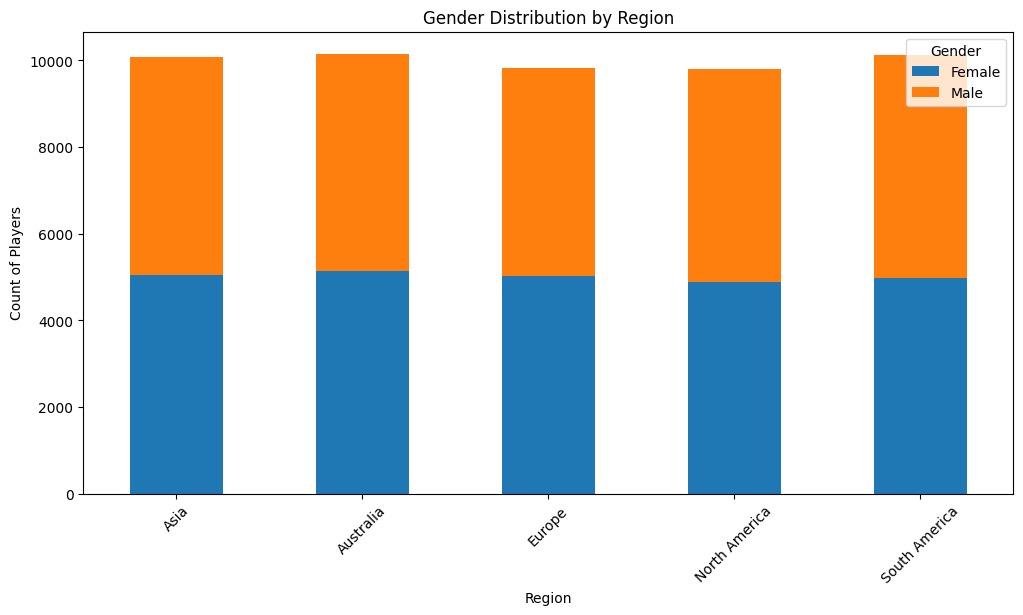

In [23]:
# Step 1: Group by region and summarize sales and player count
sales_by_region = df.groupby("Region")[["Sales (Million $)", "Player Count (Million)"]].sum()

# Step 2: Group by region and analyze demographics (Age Group, Gender)
age_group_by_region = df.groupby("Region")["Age Group"].value_counts().unstack(fill_value=0)
gender_group_by_region = df.groupby("Region")["Gender"].value_counts().unstack(fill_value=0)

# Step 3: Display the summarized data
print("Sales and Player Count by Region:\n", sales_by_region)
print("\nAge Group Distribution by Region:\n", age_group_by_region)
print("\nGender Distribution by Region:\n", gender_group_by_region)



# Plot Total Sales by Region
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_region.index, y="Sales (Million $)", data=sales_by_region)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Sales (Million $)")
plt.show()

# Plot Player Count by Region
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_region.index, y="Player Count (Million)", data=sales_by_region)
plt.title("Total Player Count by Region")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Player Count (Million)")
plt.show()

# Plot Age Group Distribution by Region
age_group_by_region.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Age Group Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count of Players")
plt.xticks(rotation=45)
plt.show()

# Plot Gender Distribution by Region
gender_group_by_region.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Gender Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count of Players")
plt.xticks(rotation=45)
plt.show()



## Description:
In this analysis of the Rea Games dataset, we explore how the gaming industry has evolved over time, focusing on game popularity and player engagement trends. By examining data on sales and player counts across different release years, we gain insights into how the gaming sector has grown, identified key years of high activity, and observed shifts in player behavior. The trends reveal patterns of growth, from the rise of certain game genres to the expanding reach of gaming platforms. Furthermore, we analyze player engagement over time, looking at metrics such as in-game purchases and playtime, providing a comprehensive view of how players' interaction with games has changed in response to new releases and evolving market dynamics. This analysis offers valuable insights for game developers, marketers, and industry analysts to understand the trajectory of the gaming industry and make data-driven decisions.

# If you like this notebook give me an upvote

## Thank you for visiting my notebook.